# Project 3 - Random Walk

**Noa Finkenhagen and Andreas Faye Werner**

## Abstract

...

## Introduction

...

## Exercise 1 - Random Walk SZ-model

Importing all necessary libraries.

In [546]:
import matplotlib.pyplot as plt
import numpy as np

from SimulationClass import Simulation
%run -i 'SimulationClass.py'

### Question 1

We start by creating an instance of the Simulation class.

In [515]:
sim = Simulation(683)

Use the *init_zombies* method to set initial zombies to 1. Then the simulation is ran 100 times and takes 300 time steps. The number of humans and zombies are appended to lists and the simulation is reset between each simulation.

In [481]:
sim.init_zombies(1)
all_humans = []
all_zombies = []

for i in range(1):
    sim.run_simulation(300)
    all_humans.append(sim.no_humans)
    all_zombies.append(sim.no_zombies)
    sim.reset()

**GIF of how the simulation evolves over time, with Z(0) = 1**

In [9]:
# Used to make GIF, doesn't need to be run
# sim.make_gif("1zombies", 300)

Calculates the mean and standard deviation of the number of humans and zombies over 100 simulations.

In [482]:
humans_avg = []
zombies_avg = []

humans_avg = np.mean(all_humans, axis=0)
zombies_avg = np.mean(all_zombies, axis=0)
humans_std = np.std(all_humans, axis=0)
zombies_std = np.std(all_zombies, axis=0)

Plots the mean and standard deviation.

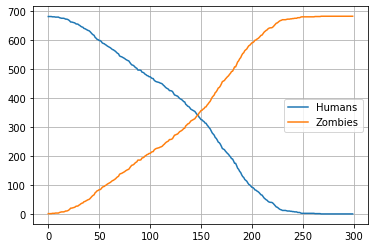

In [483]:
timestep = np.arange(300)

plt.plot(timestep, humans_avg)
plt.plot(timestep, zombies_avg)
plt.fill_between(timestep, humans_avg-humans_std, humans_avg+humans_std, alpha=0.2)
plt.fill_between(timestep, zombies_avg-zombies_std, zombies_avg+zombies_std, alpha=0.2)
plt.legend(["Humans", "Zombies"])
plt.grid()

**Comment:** Firstly, the human population declines and the zombie population increases, due to zombies colliding with humans. At around **160** time steps the zombie population overtakes the human population. Then, the zombie population increases until it reaches a population of approximately 700. Meanwhile, the human population decreases to 0. The standard deviation is less in the start of the simulation. This is due to the population size of both humans and zombies being very constant in the beginning. After some time, more humans gets infected and the variation gets bigger leading to the standard deviation increasing.

### Question 2

Running simulation with initial zombie population, **Z(0) = 10** and plotting the mean with standard deviation.

In [484]:
sim.init_zombies(10)
all_humans = []
all_zombies = []

for i in range(1):
    sim.run_simulation(300)
    all_humans.append(sim.no_humans)
    all_zombies.append(sim.no_zombies)
    sim.reset()

**GIF of how the simulation evolves over time, with Z(0) = 1**

In [ ]:
# Used to make GIF, doesn't need to be run
# sim.make_gif("1zombies", 300)

In [485]:
humans_avg = []
zombies_avg = []

humans_avg = np.mean(all_humans, axis=0)
zombies_avg = np.mean(all_zombies, axis=0)
humans_std = np.std(all_humans, axis=0)
zombies_std = np.std(all_zombies, axis=0)

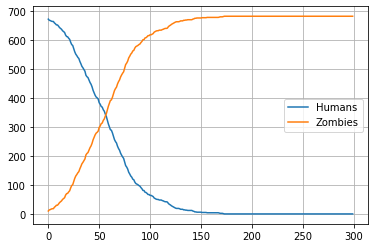

In [486]:
timestep = np.arange(300)

plt.plot(timestep, humans_avg)
plt.plot(timestep, zombies_avg)
plt.fill_between(timestep, humans_avg-humans_std, humans_avg+humans_std, alpha=0.2)
plt.fill_between(timestep, zombies_avg-zombies_std, zombies_avg+zombies_std, alpha=0.2)
plt.legend(["Humans", "Zombies"])
plt.grid()

**Comment:** Compared to the previous plot, the zombie population increasing a lot faster. Now, the zombie population equals the human population after approximately **50** time steps. The zombie population is at approximately 700 and the human population is extinct after **150** time steps. The standard deviation is more even throughout the simulation, compared to the previous plot. 

## Exercise 2

Estimating $ \beta $.

In [493]:
sim.init_zombies(10)
beta_list = []

for i in range(10):
    sim.run_simulation(300, calculate_beta=True)
    beta_list.append(sim.beta)
    sim.reset()

In [495]:


beta_mean = np.mean(beta_list)
beta_median = np.median(beta_list)
print(beta_mean)


0.03762943143812709


Applying the analytical SZ-model with the newly calculated $ \beta $.

In [496]:
def Zt(t, beta):
    return sim.N_ / (1 + (((sim.N_ - sim.IO_) / sim.IO_ ) * np.exp(-beta * t)))

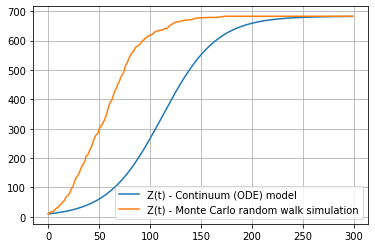

In [497]:
timestep = np.arange(300)
plt.plot(timestep, Zt(timestep, beta_mean))
plt.plot(timestep, zombies_avg)
plt.grid()
plt.legend(["Z(t) - Continuum (ODE) model", "Z(t) - Monte Carlo random walk simulation"])


**Comment:** The Monte Carlo random walk prediction has a similar shape as the continuum (ODE) model. Since we assume that $ \beta $ is constant, the continuum (ODE) model lags behind the simulation. However, if $ \beta $ varied, due to different factors such as people not believing there is a outbreak in the beginning or people fighting back, the continuum (ODE) model would be more similar to the Monte Carlo random walk simulation (??????????????????????) 

## Exercise 3

In [548]:
sim_sokndal = Simulation(683, p_death=1/24)
sim_sokndal.init_zombies(10)

In [543]:

all_humans = []
all_zombies = []
all_dead_zombies = []
for i in range(100):
    sim_sokndal.run_simulation(300, calculate_no_dead_zombies=True)
    all_humans.append(sim_sokndal.no_humans)
    all_zombies.append(sim_sokndal.no_zombies)
    all_dead_zombies.append(sim_sokndal.no_dead_zombies)
    sim_sokndal.reset()

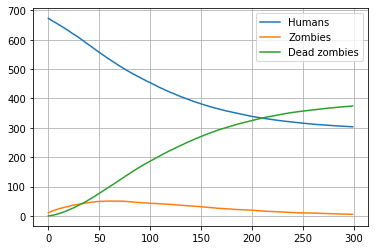

In [544]:
timestep = np.arange(300)
plt.plot(timestep, np.mean(all_humans, axis=0))
plt.plot(timestep, np.mean(all_zombies, axis=0))
plt.plot(timestep, np.mean(all_dead_zombies, axis=0))
plt.grid()
plt.legend(["Humans", "Zombies", "Dead zombies"])

In [549]:
sim_sokndal.make_gif("test1", 400)